In [137]:
import pandas as pd

pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",200)

Epoch 1/10
49/49 - 1s - loss: 0.0000e+00 - accuracy: 0.2393 - val_loss: 0.0000e+00 - val_accuracy: 0.2544
Epoch 2/10
49/49 - 0s - loss: 0.0000e+00 - accuracy: 0.2393 - val_loss: 0.0000e+00 - val_accuracy: 0.2544
Epoch 3/10
49/49 - 0s - loss: 0.0000e+00 - accuracy: 0.2393 - val_loss: 0.0000e+00 - val_accuracy: 0.2544
Epoch 4/10
49/49 - 0s - loss: 0.0000e+00 - accuracy: 0.2393 - val_loss: 0.0000e+00 - val_accuracy: 0.2544
Epoch 5/10
49/49 - 0s - loss: 0.0000e+00 - accuracy: 0.2393 - val_loss: 0.0000e+00 - val_accuracy: 0.2544
Epoch 6/10
49/49 - 0s - loss: 0.0000e+00 - accuracy: 0.2393 - val_loss: 0.0000e+00 - val_accuracy: 0.2544
Epoch 7/10
49/49 - 0s - loss: 0.0000e+00 - accuracy: 0.2393 - val_loss: 0.0000e+00 - val_accuracy: 0.2544
Epoch 8/10
49/49 - 0s - loss: 0.0000e+00 - accuracy: 0.2393 - val_loss: 0.0000e+00 - val_accuracy: 0.2544
Epoch 9/10
49/49 - 0s - loss: 0.0000e+00 - accuracy: 0.2393 - val_loss: 0.0000e+00 - val_accuracy: 0.2544
Epoch 10/10
49/49 - 0s - loss: 0.0000e+00 - ac

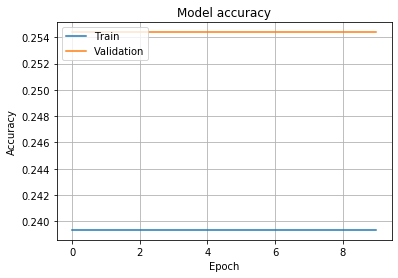

In [25]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from sklearn import svm, linear_model, preprocessing
from sklearn.preprocessing import LabelBinarizer

import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import MySQLdb
import itertools

i = 0
X = []
Y = []
X_train = []
Y_train = []
X_test = []
Y_test = []

# データ読み込み
conn = MySQLdb.connect(host='localhost', port=3306, user='user1', passwd='Silver8810', db='hrdb', charset='utf8')
cur = conn.cursor()
cur.execute("SELECT Frame, Sex, Age, Handicap, RName, Weight, Increase, Year, Month, Start, Weather, Ground, GCondition, Distance, Prize1, Prize2, Prize3, Prize4, Prize5 from jra_data")
for Var in cur:
    X.append(list(Var))
cur.execute("SELECT Pref from jra_data")
for Var in cur:
    if Var[0] < 4:
        Y.append(1)
    else:
        Y.append(0)

# One-hot encording
# Xに入れる際にそれぞれの要素内で順番が逆になっている。 print(Sex_ohe[0]と実際にX内に入っている数値が逆)forの仕様？
# 全て一律に逆になっているのであれば問題はないので修正はしない。
Frame_ohe = [i[0] for i in X]
Frame_ohe = LabelBinarizer().fit_transform(Frame_ohe)
Sex_ohe = [i[2] for i in X]
Sex_ohe = LabelBinarizer().fit_transform(Sex_ohe)
RName_ohe = [i[5] for i in X]
RName_ohe = LabelBinarizer().fit_transform(RName_ohe)
Year_ohe = [i[8] for i in X]
Year_ohe = LabelBinarizer().fit_transform(Year_ohe)
Month_ohe = [i[9] for i in X]
Month_ohe = LabelBinarizer().fit_transform(Month_ohe)
Start_ohe = [i[10] for i in X]
Start_ohe = LabelBinarizer().fit_transform(Start_ohe)
Weather_ohe = [i[11] for i in X]
Weather_ohe = LabelBinarizer().fit_transform(Weather_ohe)
Ground_ohe = [i[12] for i in X]
Ground_ohe = LabelBinarizer().fit_transform(Ground_ohe)
GCondition_ohe = [i[13] for i in X]
GCondition_ohe = LabelBinarizer().fit_transform(GCondition_ohe)

for i in range(len(X)):
    del X[i][0:2]
    del X[i][2]
    del X[i][4:10]

#標準化
X = preprocessing.scale(X)
X = X.tolist()

for i in range(len(X)):
    for j in Frame_ohe[i]:
        X[i].append(j)
    for j in Sex_ohe[i]:
        X[i].append(j)
    for j in RName_ohe[i]:
        X[i].append(j)
    for j in Year_ohe[i]:
        X[i].append(j)
    for j in Month_ohe[i]:
        X[i].append(j)
    for j in Start_ohe[i]:
        X[i].append(j)
    for j in Weather_ohe[i]:
        X[i].append(j)
    for j in Ground_ohe[i]:
        X[i].append(j)
    for j in GCondition_ohe[i]:
        X[i].append(j)
        
i=0
#バッチサイズで割り切れる様に3072としている。
#fit.関数のvalidation_splitを使えば最後の一部をテストデータとして使えるのでこれはいらなかった。
#for Var in X:
#    if i < 3072:
#        X_train.append(Var)
#        Y_train.append(Y[i])
#        i += 1
#    elif i < 3392:
#        X_test.append(Var)
#        Y_test.append(Y[i])
#        i += 1
#    else:
#        break

#X_train = np.array(X_train).astype(np.float32)
#X_test = np.array(X_test).astype(np.float32)
#Y_train = np.array(Y_train)
#Y_test = np.array(Y_test)

X = np.array(X).astype(np.float32)
Y = np.array(Y)
#print(f"X={len(X)}、Y={len(Y)}")
#print(f"X_test={len(X_test)}、Y_test={len(Y_test)}")

# モデル
model = Sequential()
# 全結合層(18を500に)
#model.add(Dense(input_dim=100, output_dim=500))
#model.add(Dense(units=20, input_dim=100, output_dim=500))
model.add(Dense(100, activation='relu',input_dim=178))
# 各バッチ毎に前の層の出力を正規化する。
model.add(BatchNormalization())
# 全結合層(500を2に) 
#model.add(Dense(output_dim=2))
model.add(Dense(1,activation = 'softmax'))
# softmax関数
#model.add(Activation("softmax"))
# コンパイル
optimizer = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
# 実行
#model.fit(X, Y, nb_epoch=300, batch_size=50,validation_split=0.1)
#history = model.fit(X_train, Y_train, epochs=10, batch_size=64, verbose=2, validation_data=(X_test, Y_test))# validation_split=0.1)
history = model.fit(X, Y, epochs=10, batch_size=64, verbose=2, validation_split=0.1)
#hist = model.fit(X_train, Y_train)
#loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=64)

# 予測
#results = model.predict_proba(np.array(X_test))
# 結果
#print("Predict:\n", results)

#モデル保存
SAVE_DATA_DIR_PATH = "E:\\プログラミング\\python_model\\"
model.save_weights(SAVE_DATA_DIR_PATH + "weight.hdf5")

# グラフ化
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

cur.close()
conn.close()

In [132]:
import numpy as np

a = np.arange(24).reshape(4, 6)
#print(a)
#print(f"00={np.delete(a,0,0)}")
#print(f"01={np.delete(a,0,1)}")
#print(f"10={np.delete(a,1,0)}")
#print(f"20={np.delete(a,2,0)}")
#print(f"20={np.delete(a,slice(0,3),1)}")

b = np.arange(12).reshape(4,3)
print(a)
print(b)

c = np.insert(a[0], 2, b[0])
print(c)
print(b.shape[0])

d = np.array([[i for j in range(0, 9)] for i in range(0, 4)])
print(d)
for i in range(b.shape[0]):
    d[i] = np.insert(a[i], 4, b[i])
print(d)
e = [[1,2,3],[2,4,8],[3,9,6]]
print(preprocessing.scale(e))
print(preprocessing.scale(e, axis = 1))

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 0 1 2 2 3 4 5]
4
[[0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3]]
[[ 0  1  2  3  0  1  2  4  5]
 [ 6  7  8  9  3  4  5 10 11]
 [12 13 14 15  6  7  8 16 17]
 [18 19 20 21  9 10 11 22 23]]
[[-1.22474487 -1.01904933 -1.29777137]
 [ 0.         -0.33968311  1.13554995]
 [ 1.22474487  1.35873244  0.16222142]]
[[-1.22474487  0.          1.22474487]
 [-1.06904497 -0.26726124  1.33630621]
 [-1.22474487  1.22474487  0.        ]]


In [89]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [104]:
loss_and_metrics.history.keys()

AttributeError: 'list' object has no attribute 'history'

In [109]:
a = [0,1,2,3]
print(f"type={type(a)},len={len(a)}")

type=<class 'list'>,len=4
